<a href="https://colab.research.google.com/github/Mahfuz12309/kickstarter_project_success_prediction/blob/main/kickstarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import io
import glob
from matplotlib import cm

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data=pd.read_csv('/content/gdrive/MyDrive/kickstarter.csv')
# data = pd.concat([pd.read_csv(f) for f in glob.glob('/content/drive/MyDrive/IOT_LAB/Dataset/kickstarter*.csv')], ignore_index = True)

In [4]:
data.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,0,A holder for your bluetooth speaker or anythin...,"{""id"":28,""name"":""Product Design"",""analytics_na...",0.0,US,the United States,1649097184,"{""id"":1466474871,""name"":""NOV ROD"",""slug"":""spca...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1665629160,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,0.000000,international
1,15,Upgrade your serving ware with stunning pieces...,"{""id"":28,""name"":""Product Design"",""analytics_na...",3477.0,AU,Australia,1652842346,"{""id"":1210368968,""name"":""The Knife Shed"",""slug...",AUD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1665615606,0.626250,"{""web"":{""project"":""https://www.kickstarter.com...",0.625483,3481.522816,international
2,2,"Simple, fun and effective tool that combines a...","{""id"":28,""name"":""Product Design"",""analytics_na...",73.0,CA,Canada,1654077888,"{""id"":996473613,""name"":""Luai Eshaq"",""is_regist...",CAD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1665611086,0.722862,"{""web"":{""project"":""https://www.kickstarter.com...",0.723731,73.218688,international
3,36,"Versatile, patent-pending curtains that block ...","{""id"":28,""name"":""Product Design"",""analytics_na...",13739.0,US,the United States,1656110586,"{""id"":707654884,""name"":""OtterSpace"",""slug"":""in...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1665592333,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,13739.000000,international
4,17,Small effective & workable Damascus knife 100%...,"{""id"":28,""name"":""Product Design"",""analytics_na...",1041.0,GB,the United Kingdom,1664223082,"{""id"":1765983699,""name"":""Aria Gold"",""slug"":""ar...",GBP,£,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1665590851,1.103752,"{""web"":{""project"":""https://www.kickstarter.com...",1.094648,1049.667715,international


In [5]:
len(data)

24092

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backers_count             24092 non-null  int64  
 1   blurb                     24090 non-null  object 
 2   category                  24092 non-null  object 
 3   converted_pledged_amount  24061 non-null  float64
 4   country                   24092 non-null  object 
 5   country_displayable_name  24092 non-null  object 
 6   created_at                24092 non-null  int64  
 7   creator                   24092 non-null  object 
 8   currency                  24092 non-null  object 
 9   currency_symbol           24092 non-null  object 
 10  currency_trailing_code    24092 non-null  bool   
 11  current_currency          24092 non-null  object 
 12  deadline                  24092 non-null  int64  
 13  disable_communication     24092 non-null  bool   
 14  fx_rat

In [7]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'launched_at', 'location', 'name',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_exchange_rate', 'usd_pledged', 'usd_type'],
      dtype='object')

Description of each column:

0.backers_count - How many people has backed the project

1.blurb - description about the project

2.category - which catagory or sub catagory the product belongs to

3.converted_pledged_amount - amount of money pledged

4.country - from which country the project belong to.

5.country displayale name- which county will be name will be shown for the project

6.created_at - when the project was created

7.creator - information about the project uploader.

8.currency - currency of the project

9.currency_symbol - symbol of the currency

10.currency_trailing_code - code for the the original currency.

11.current_currency - currency the project goal was converted to

12.deadline - date and time of when the project will close for donations

13.disable_communication - whether or not a project owner disabled communication with their backers

14.fx_rate - foreign exchange rate between the original currency and the current_currency

15.goal - funding goal

16.id - id number fo the project

17.is_starrable - is the project liked and saved by users

18.launched_at - date and time of when the project was launched for funding

19.location - the town or city of the project creator

20.name - name of the project

21.photo - contains a link and information to the project's photo/s

22.pledged - amount pledged in the current_currency

23.profile - details about the project's profile, including id number and various visual settings

24.slug - name of the project with hyphens instead of spaces

25.source_url - url for the project's category

26.spotlight - after a project has been successful, it is spotlighted on the Kickstarter website

27.staff_pick - whether a project was highlighted as a staff_pick when it was launched/live

28.state - whether a project was successful, failed, canceled, suspending or still live

29.state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)

30.static_usd_rate - conversion rate between the original currency and USD

31.urls - url to the project's page

32.usds_exchanged_rate - rate of usd collection exchange rate

33.usd_pledged - amount pledged in USD

34.usd_type - domestic or international

In [8]:
len(data[data.duplicated(subset='id')])

2013

In [9]:
data.drop(['converted_pledged_amount','country_displayable_name','creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'disable_communication', 'fx_rate','location',
       'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'state_changed_at','urls','usd_exchange_rate','usd_type'], axis=1, inplace=True)


In [10]:
data.head()

,backers_count,blurb,category,country,created_at,deadline,goal,id,is_starrable,launched_at,name,staff_pick,state,static_usd_rate,usd_pledged
0,0,A holder for your bluetooth speaker or anythin...,"{""id"":28,""name"":""Product Design"",""analytics_na...",US,1649097184,1669088758,500.0,493400677,True,1665629158,HOLDACITY...A speaker/bottle for your adventur...,False,live,1.000000,0.000000
1,15,Upgrade your serving ware with stunning pieces...,"{""id"":28,""name"":""Product Design"",""analytics_na...",AU,1652842346,1668211203,5000.0,1992543392,True,1665615603,Australian Table Knives Collection,False,live,0.626250,3481.522816
2,2,"Simple, fun and effective tool that combines a...","{""id"":28,""name"":""Product Design"",""analytics_na...",CA,1654077888,1668206684,10000.0,842750969,True,1665611084,Child bidet and potty,False,live,0.722862,73.218688
3,36,"Versatile, patent-pending curtains that block ...","{""id"":28,""name"":""Product Design"",""analytics_na...",US,1656110586,1667320329,8000.0,129573931,True,1665592329,OtterSpace: Blackout curtains that block ALL l...,False,live,1.000000,13739.000000
4,17,Small effective & workable Damascus knife 100%...,"{""id"":28,""name"":""Product Design"",""analytics_na...",GB,1664223082,1667840849,800.0,731912077,True,1665590849,Aria - The smallest Damascus Gold folding knife,False,live,1.103752,1049.667715


In [11]:
data.head()

,backers_count,blurb,category,country,created_at,deadline,goal,id,is_starrable,launched_at,name,staff_pick,state,static_usd_rate,usd_pledged
0,0,A holder for your bluetooth speaker or anythin...,"{""id"":28,""name"":""Product Design"",""analytics_na...",US,1649097184,1669088758,500.0,493400677,True,1665629158,HOLDACITY...A speaker/bottle for your adventur...,False,live,1.000000,0.000000
1,15,Upgrade your serving ware with stunning pieces...,"{""id"":28,""name"":""Product Design"",""analytics_na...",AU,1652842346,1668211203,5000.0,1992543392,True,1665615603,Australian Table Knives Collection,False,live,0.626250,3481.522816
2,2,"Simple, fun and effective tool that combines a...","{""id"":28,""name"":""Product Design"",""analytics_na...",CA,1654077888,1668206684,10000.0,842750969,True,1665611084,Child bidet and potty,False,live,0.722862,73.218688
3,36,"Versatile, patent-pending curtains that block ...","{""id"":28,""name"":""Product Design"",""analytics_na...",US,1656110586,1667320329,8000.0,129573931,True,1665592329,OtterSpace: Blackout curtains that block ALL l...,False,live,1.000000,13739.000000
4,17,Small effective & workable Damascus knife 100%...,"{""id"":28,""name"":""Product Design"",""analytics_na...",GB,1664223082,1667840849,800.0,731912077,True,1665590849,Aria - The smallest Damascus Gold folding knife,False,live,1.103752,1049.667715


In [12]:
#converting unix time to dataframe
unixtime= ['created_at', 'deadline', 'launched_at']
for c in unixtime:
    data[c] = pd.to_datetime(data[c], origin='unix', unit='s')

In [13]:
min(data.created_at).strftime('%d %B %Y')

'23 April 2009'

In [14]:
max(data.created_at).strftime('%d %B %Y')

'09 October 2022'

In [15]:
#count the blurb length
data['blurb_length'] = data['blurb'].str.split().str.len()

# Drop blurb variable
data.drop('blurb', axis=1, inplace=True)

In [16]:
data.head()

,backers_count,category,country,created_at,deadline,goal,id,is_starrable,launched_at,name,staff_pick,state,static_usd_rate,usd_pledged,blurb_length
0,0,"{""id"":28,""name"":""Product Design"",""analytics_na...",US,2022-04-04 18:33:04,2022-11-22 03:45:58,500.0,493400677,True,2022-10-13 02:45:58,HOLDACITY...A speaker/bottle for your adventur...,False,live,1.000000,0.000000,20.0
1,15,"{""id"":28,""name"":""Product Design"",""analytics_na...",AU,2022-05-18 02:52:26,2022-11-12 00:00:03,5000.0,1992543392,True,2022-10-12 23:00:03,Australian Table Knives Collection,False,live,0.626250,3481.522816,17.0
2,2,"{""id"":28,""name"":""Product Design"",""analytics_na...",CA,2022-06-01 10:04:48,2022-11-11 22:44:44,10000.0,842750969,True,2022-10-12 21:44:44,Child bidet and potty,False,live,0.722862,73.218688,24.0
3,36,"{""id"":28,""name"":""Product Design"",""analytics_na...",US,2022-06-24 22:43:06,2022-11-01 16:32:09,8000.0,129573931,True,2022-10-12 16:32:09,OtterSpace: Blackout curtains that block ALL l...,False,live,1.000000,13739.000000,17.0
4,17,"{""id"":28,""name"":""Product Design"",""analytics_na...",GB,2022-09-26 20:11:22,2022-11-07 17:07:29,800.0,731912077,True,2022-10-12 16:07:29,Aria - The smallest Damascus Gold folding knife,False,live,1.103752,1049.667715,9.0


In [17]:
data.iloc[0]['category']

'{"id":28,"name":"Product Design","analytics_name":"Product Design","slug":"design/product design","position":5,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/product%20design"}}}'

In [18]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
data['sub_category'] = data.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
data['category'] = data.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0]
# Some categories do not have a sub-category, so do not have a '/' to split with
data['category'] = data.apply(f, axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   backers_count    24092 non-null  int64         
 1   category         24092 non-null  object        
 2   country          24092 non-null  object        
 3   created_at       24092 non-null  datetime64[ns]
 4   deadline         24092 non-null  datetime64[ns]
 5   goal             24092 non-null  float64       
 6   id               24092 non-null  int64         
 7   is_starrable     24092 non-null  bool          
 8   launched_at      24092 non-null  datetime64[ns]
 9   name             24092 non-null  object        
 10  staff_pick       24092 non-null  bool          
 11  state            24092 non-null  object        
 12  static_usd_rate  24092 non-null  float64       
 13  usd_pledged      24061 non-null  float64       
 14  blurb_length     24090 non-null  float

In [20]:
data.isnull().sum()

backers_count       0
category            0
country             0
created_at          0
deadline            0
goal                0
id                  0
is_starrable        0
launched_at         0
name                0
staff_pick          0
state               0
static_usd_rate     0
usd_pledged        31
blurb_length        2
sub_category        0
dtype: int64

In [21]:
data['usd_goal'] = round(data['goal'] * data['static_usd_rate'])

In [22]:
data.head()

,backers_count,category,country,created_at,deadline,goal,id,is_starrable,launched_at,name,staff_pick,state,static_usd_rate,usd_pledged,blurb_length,sub_category,usd_goal
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,500.0,493400677,True,2022-10-13 02:45:58,HOLDACITY...A speaker/bottle for your adventur...,False,live,1.000000,0.000000,20.0,product design,500.0
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,5000.0,1992543392,True,2022-10-12 23:00:03,Australian Table Knives Collection,False,live,0.626250,3481.522816,17.0,product design,3131.0
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,10000.0,842750969,True,2022-10-12 21:44:44,Child bidet and potty,False,live,0.722862,73.218688,24.0,product design,7229.0
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,8000.0,129573931,True,2022-10-12 16:32:09,OtterSpace: Blackout curtains that block ALL l...,False,live,1.000000,13739.000000,17.0,product design,8000.0
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,800.0,731912077,True,2022-10-12 16:07:29,Aria - The smallest Damascus Gold folding knife,False,live,1.103752,1049.667715,9.0,product design,883.0


In [23]:
data.drop(['goal','static_usd_rate'], axis=1, inplace= True)

In [24]:
data.head(5)

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,name,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,493400677,True,2022-10-13 02:45:58,HOLDACITY...A speaker/bottle for your adventur...,False,live,0.000000,20.0,product design,500.0
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,1992543392,True,2022-10-12 23:00:03,Australian Table Knives Collection,False,live,3481.522816,17.0,product design,3131.0
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,842750969,True,2022-10-12 21:44:44,Child bidet and potty,False,live,73.218688,24.0,product design,7229.0
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,129573931,True,2022-10-12 16:32:09,OtterSpace: Blackout curtains that block ALL l...,False,live,13739.000000,17.0,product design,8000.0
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,731912077,True,2022-10-12 16:07:29,Aria - The smallest Damascus Gold folding knife,False,live,1049.667715,9.0,product design,883.0


In [25]:
# Count length of each name
data['name_length'] = data['name'].str.split().str.len()
# Drop name variable
data.drop('name', axis=1, inplace=True)

In [26]:
data.head()

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,493400677,True,2022-10-13 02:45:58,False,live,0.000000,20.0,product design,500.0,5
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,1992543392,True,2022-10-12 23:00:03,False,live,3481.522816,17.0,product design,3131.0,4
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,842750969,True,2022-10-12 21:44:44,False,live,73.218688,24.0,product design,7229.0,4
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,129573931,True,2022-10-12 16:32:09,False,live,13739.000000,17.0,product design,8000.0,7
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,731912077,True,2022-10-12 16:07:29,False,live,1049.667715,9.0,product design,883.0,8


In [27]:
#rounding the usd_pledges amount two 2 decimal point
data['usd_pledged'] = round(data['usd_pledged'],2)

In [28]:
data.head()

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,493400677,True,2022-10-13 02:45:58,False,live,0.00,20.0,product design,500.0,5
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,1992543392,True,2022-10-12 23:00:03,False,live,3481.52,17.0,product design,3131.0,4
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,842750969,True,2022-10-12 21:44:44,False,live,73.22,24.0,product design,7229.0,4
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,129573931,True,2022-10-12 16:32:09,False,live,13739.00,17.0,product design,8000.0,7
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,731912077,True,2022-10-12 16:07:29,False,live,1049.67,9.0,product design,883.0,8


**Lets make the campaign duration it can be made with the hours and the days format
but there are three types of date 1. created days 2.launch days 3.deadline
I am going make a two separated collumn for the 1.created to launch 2.campaign days-launch to deadline

for more details we can find all the date to time and weekday too **

In [29]:
# Time between creating and launching a project
data['create_to_launch'] = data['launched_at'] - data['created_at']
data['create_to_launch'] = data['create_to_launch'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# data['creation_to_launch_hours'] = data['launched_at'] - data['created_at']
# data['creation_to_launch_hours'] = data['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h')

# Campaign length
data['campaign_days'] = data['deadline'] - data['launched_at']
data['campaign_days'] = data['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
data['launch_day'] = data['launched_at'].dt.day_name()

# Deadline day of week
data['deadline_day'] = data['deadline'].dt.day_name()

# Launch month
data['launch_month'] = data['launched_at'].dt.month_name()

# Deadline month
data['deadline_month'] = data['deadline'].dt.month_name()

In [30]:
# Mean pledge per backer
data['pledge_per_backer'] = round(data['usd_pledged']/data['backers_count'],2)

In [31]:
data.head()

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,...,sub_category,usd_goal,name_length,create_to_launch,campaign_days,launch_day,deadline_day,launch_month,deadline_month,pledge_per_backer
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,493400677,True,2022-10-13 02:45:58,False,live,...,product design,500.0,5,191,40,Thursday,Tuesday,October,November,NaN
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,1992543392,True,2022-10-12 23:00:03,False,live,...,product design,3131.0,4,148,30,Wednesday,Saturday,October,November,232.10
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,842750969,True,2022-10-12 21:44:44,False,live,...,product design,7229.0,4,133,30,Wednesday,Friday,October,November,36.61
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,129573931,True,2022-10-12 16:32:09,False,live,...,product design,8000.0,7,110,20,Wednesday,Tuesday,October,November,381.64
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,731912077,True,2022-10-12 16:07:29,False,live,...,product design,883.0,8,16,26,Wednesday,Monday,October,November,61.75


In [32]:
data.isnull().sum()

backers_count           0
category                0
country                 0
created_at              0
deadline                0
id                      0
is_starrable            0
launched_at             0
staff_pick              0
state                   0
usd_pledged            31
blurb_length            2
sub_category            0
usd_goal                0
name_length             0
create_to_launch        0
campaign_days           0
launch_day              0
deadline_day            0
launch_month            0
deadline_month          0
pledge_per_backer    1378
dtype: int64

In [33]:
data.usd_pledged.fillna(0,inplace=True)
data.blurb_length.fillna(0,inplace=True)

In [34]:
data.head()

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,...,sub_category,usd_goal,name_length,create_to_launch,campaign_days,launch_day,deadline_day,launch_month,deadline_month,pledge_per_backer
0,0,design,US,2022-04-04 18:33:04,2022-11-22 03:45:58,493400677,True,2022-10-13 02:45:58,False,live,...,product design,500.0,5,191,40,Thursday,Tuesday,October,November,NaN
1,15,design,AU,2022-05-18 02:52:26,2022-11-12 00:00:03,1992543392,True,2022-10-12 23:00:03,False,live,...,product design,3131.0,4,148,30,Wednesday,Saturday,October,November,232.10
2,2,design,CA,2022-06-01 10:04:48,2022-11-11 22:44:44,842750969,True,2022-10-12 21:44:44,False,live,...,product design,7229.0,4,133,30,Wednesday,Friday,October,November,36.61
3,36,design,US,2022-06-24 22:43:06,2022-11-01 16:32:09,129573931,True,2022-10-12 16:32:09,False,live,...,product design,8000.0,7,110,20,Wednesday,Tuesday,October,November,381.64
4,17,design,GB,2022-09-26 20:11:22,2022-11-07 17:07:29,731912077,True,2022-10-12 16:07:29,False,live,...,product design,883.0,8,16,26,Wednesday,Monday,October,November,61.75


In [35]:
data.isnull().sum()

backers_count           0
category                0
country                 0
created_at              0
deadline                0
id                      0
is_starrable            0
launched_at             0
staff_pick              0
state                   0
usd_pledged             0
blurb_length            0
sub_category            0
usd_goal                0
name_length             0
create_to_launch        0
campaign_days           0
launch_day              0
deadline_day            0
launch_month            0
deadline_month          0
pledge_per_backer    1378
dtype: int64

In [36]:
data.state.value_counts()

successful    15089
failed         7436
canceled        769
live            767
submitted        29
started           2
Name: state, dtype: int64

In [37]:
# Dropping projects which are not successes or failures
data = data[data['state'].isin(['successful', 'failed'])]

In [38]:
duplicates = data[data.duplicated(subset='id')]
print(f"among the {len(data)} projectsthere are {len(data[data.duplicated(subset='id')])}")


among the 22525 projectsthere are 1891


In [39]:
data.drop_duplicates(inplace=True)

In [40]:
len(data)

20634

In [41]:
print(len(data[data.duplicated(subset='id')]), "duplicated projects remain.")

0 duplicated projects remain.


**exploring data**

In [42]:
data.describe()

,backers_count,id,usd_pledged,blurb_length,usd_goal,name_length,create_to_launch,campaign_days,pledge_per_backer
count,20634.000000,2.063400e+04,2.063400e+04,20634.000000,2.063400e+04,20634.000000,20634.000000,20634.000000,19650.000000
mean,176.985025,1.071394e+09,1.677519e+04,17.843898,2.477842e+04,5.786372,53.413928,33.243288,82.476084
std,748.134088,6.190681e+08,1.091028e+05,5.581437,4.637875e+05,2.673245,149.548840,12.268200,130.453237
min,0.000000,4.813900e+04,0.000000e+00,1.000000,1.000000e+00,1.000000,0.000000,1.000000,0.500000
25%,8.000000,5.361533e+08,3.020000e+02,14.000000,1.500000e+03,4.000000,4.000000,30.000000,29.530000
50%,40.000000,1.068985e+09,2.562090e+03,19.000000,4.500000e+03,6.000000,14.000000,30.000000,51.850000
75%,123.000000,1.607673e+09,9.435250e+03,22.000000,1.111100e+04,8.000000,42.000000,35.000000,90.917500
max,35550.000000,2.147437e+09,6.788517e+06,32.000000,5.500000e+07,16.000000,2816.000000,91.000000,4025.000000


In [43]:
print("Key stats:")
print("\nThe total amount of money are requested for raise ${0:,.0f}".format(data.usd_goal.sum()))
print("The total amount of money pledged ${0:,.0f}".format(data.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(data.loc[data['state'] == 'successful'].usd_pledged)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(data)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(data.loc[data['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(data.loc[data['state'] == 'successful'])/len(data))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(data.usd_goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(data.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(data.loc[data['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(data.loc[data['state'] == 'failed'].usd_pledged.mean()))

print("\nThe mean number of backers per project is", int(round(data.backers_count.mean(),0)))
print("The mean pledge per backer is ${0:,.0f}".format(data.pledge_per_backer.mean()))
print("The mean number of days a campaign is run for is", int(round(data.campaign_days.mean(),0)))

Key stats:

The total amount of money are requested for raise $511,277,870
The total amount of money pledged $346,139,309
The total amount of money pledged by backers to successful projects is $338,517,480

The total number of successful or failed projects launched on Kickstarter is: 20,634
The total number of projects which were successfully funded is: 14,001
The proportion of completed projects which were successfully funded is: 68%

The mean project fundraising goal is $24,778
The mean amount pledged per project is $16,775
The mean amount pledged per successful project is $24,178
The mean amount pledged per failed project is $1,149

The mean number of backers per project is 177
The mean pledge per backer is $82
The mean number of days a campaign is run for is 33


In [44]:
percentual_sucess = round(data["state"].value_counts() / len(data["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

State Percentual in %: 
successful    67.85
failed        32.15
Name: state, dtype: float64


In [45]:
print(len(data))
print(len(data.columns))

20634
22


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 15 to 24090
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   backers_count      20634 non-null  int64         
 1   category           20634 non-null  object        
 2   country            20634 non-null  object        
 3   created_at         20634 non-null  datetime64[ns]
 4   deadline           20634 non-null  datetime64[ns]
 5   id                 20634 non-null  int64         
 6   is_starrable       20634 non-null  bool          
 7   launched_at        20634 non-null  datetime64[ns]
 8   staff_pick         20634 non-null  bool          
 9   state              20634 non-null  object        
 10  usd_pledged        20634 non-null  float64       
 11  blurb_length       20634 non-null  float64       
 12  sub_category       20634 non-null  object        
 13  usd_goal           20634 non-null  float64       
 14  name_

<Axes: ylabel='state'>

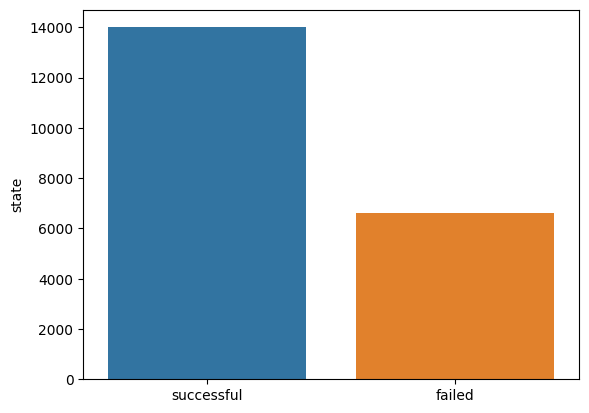

In [47]:
sns.barplot(x=data.state.value_counts().index, y=data.state.value_counts())

[Text(0, 0, 'comics'),
 Text(1, 0, 'publishing'),
 Text(2, 0, 'music'),
 Text(3, 0, 'food'),
 Text(4, 0, 'design'),
 Text(5, 0, 'film & video'),
 Text(6, 0, 'theater'),
 Text(7, 0, 'technology'),
 Text(8, 0, 'journalism')]

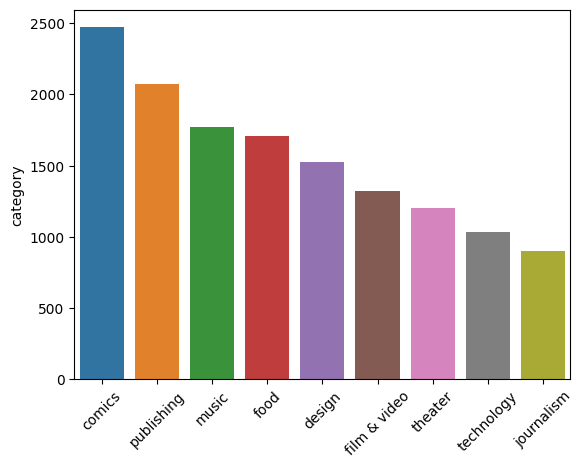

In [48]:
# Distribution of projectstates in different categories
temp_data = data[data.state == "successful"]

ax = sns.barplot(x=temp_data.category.value_counts().index, y=temp_data.category.value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

<Axes: >

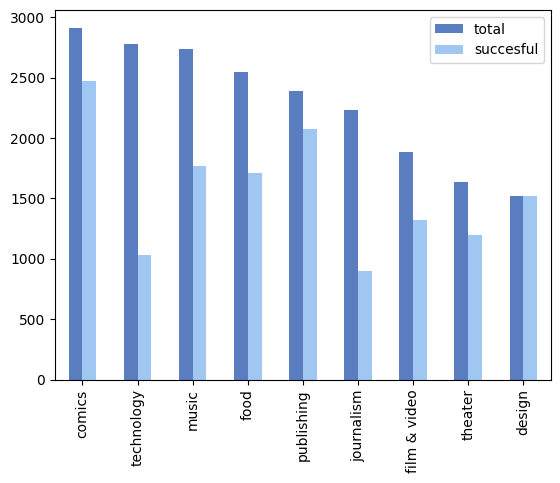

In [49]:
succesful_projects = pd.concat([data.category.value_counts(), temp_data.category.value_counts()], axis=1)

succesful_projects.columns.values[0] = "total"
succesful_projects.columns.values[1] = "succesful"
succesful_projects.sort_values(by='total')

succesful_projects.plot(kind='bar', color=['#597DBE', '#A0C7F1'])

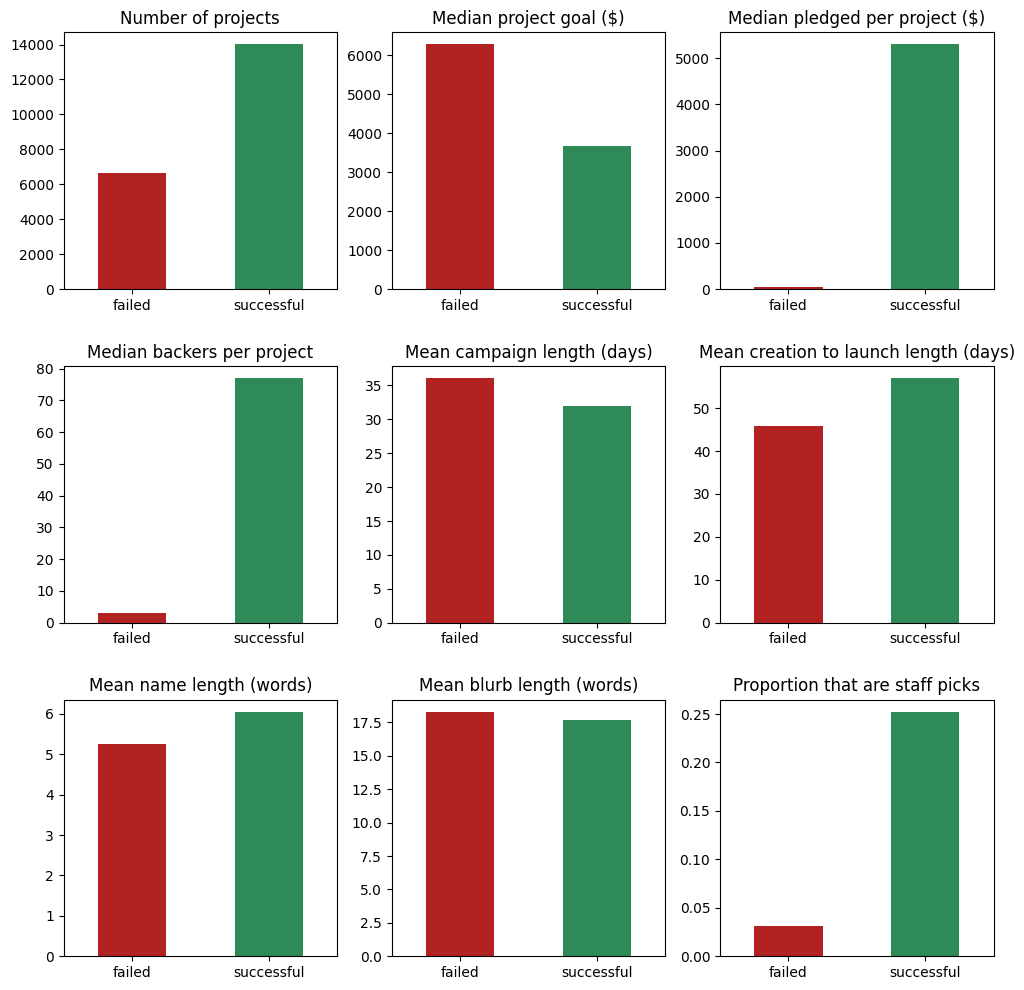

In [50]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

data['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

data.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

data.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

data.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

data.groupby('state').campaign_days.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Mean campaign length (days)')
ax5.set_xlabel('')

data.groupby('state').create_to_launch.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Mean creation to launch length (days)')
ax6.set_xlabel('')

data.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

data.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

# Creating a dataframe grouped by staff_pick with columns for failed and successful
pick_df = pd.get_dummies(data.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', ax=ax9, color=['firebrick', 'seagreen'], rot=0)
ax9.set_title('Proportion that are staff picks')
ax9.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

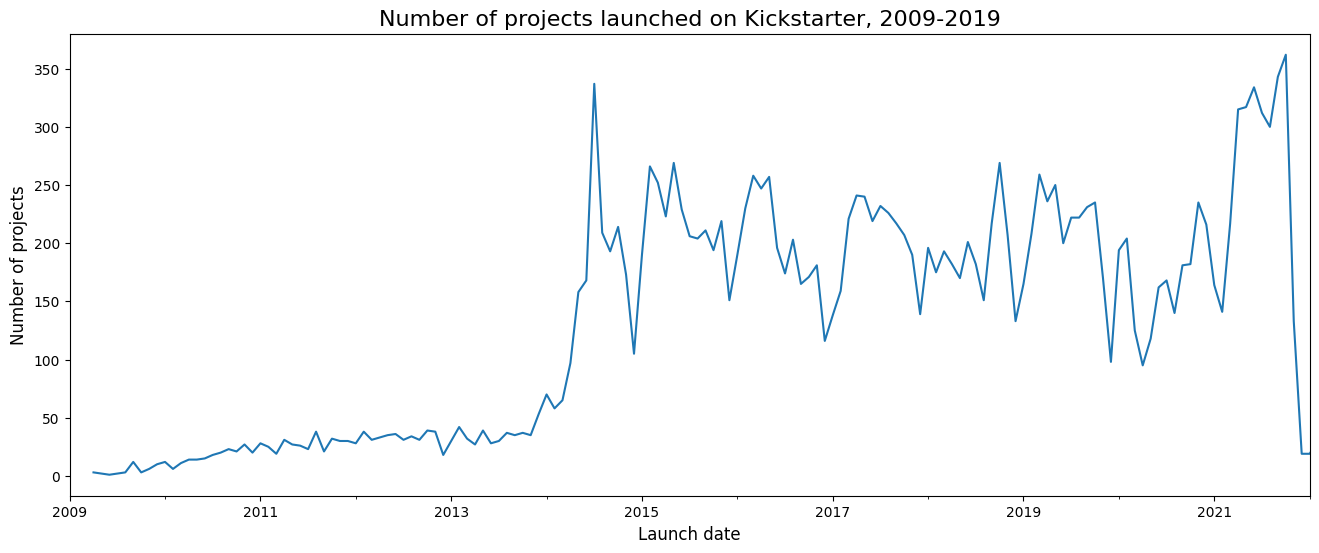

In [51]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
data.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2022-01-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2019', fontsize=16)
plt.show()

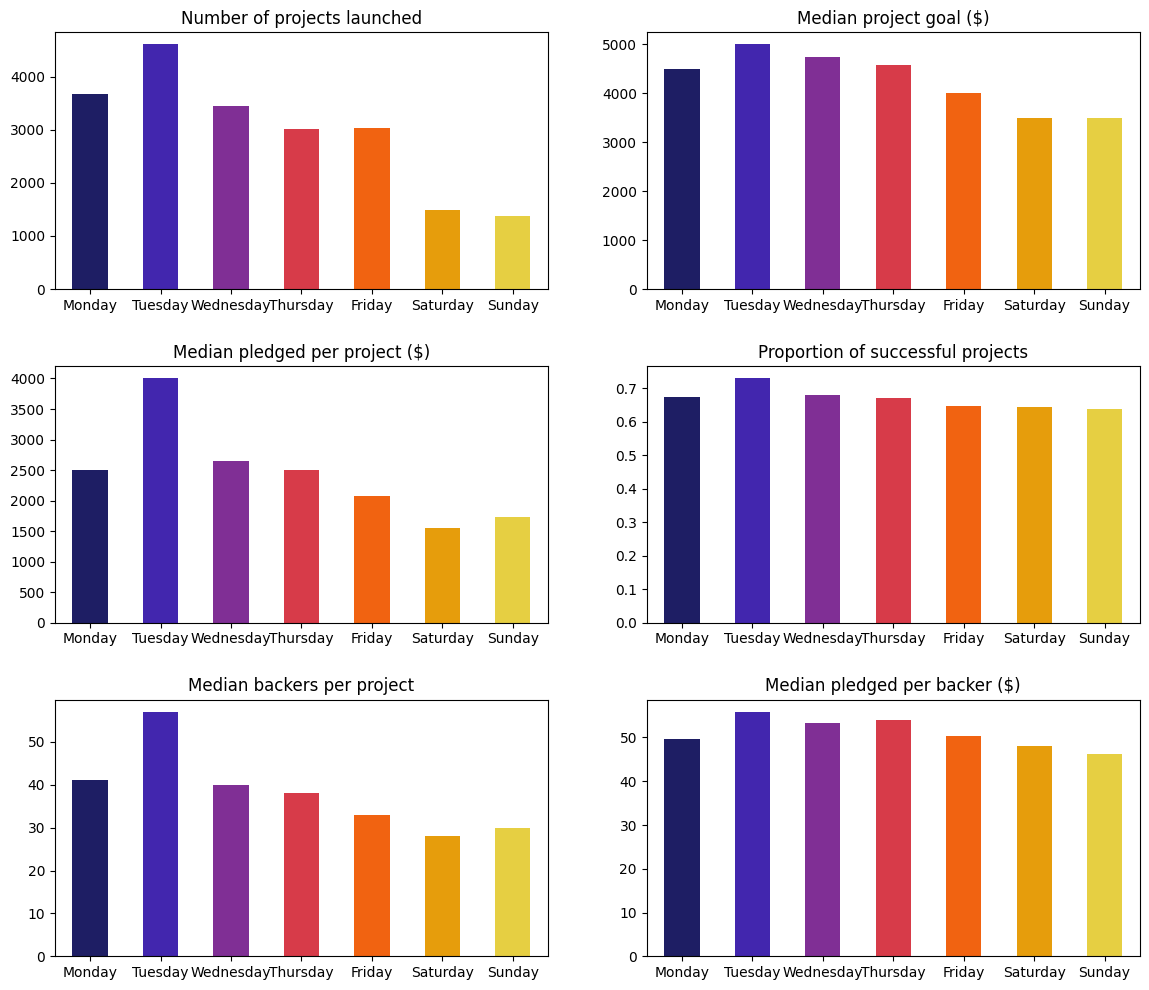

In [52]:
# Creating a dataframe grouped by the day on which they were launched, with columns for failed and successful
day_df = pd.get_dummies(data.set_index('launch_day').state).groupby('launch_day').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,data.launch_day.nunique()))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data.groupby('launch_day').launch_day.count().reindex(weekdays).plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

data.groupby('launch_day').usd_goal.median().reindex(weekdays).plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

data.groupby('launch_day').usd_pledged.median().reindex(weekdays).plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', ax=ax4, color=color, rot=0)
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

data.groupby('launch_day').backers_count.median().reindex(weekdays).plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

data.groupby('launch_day').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

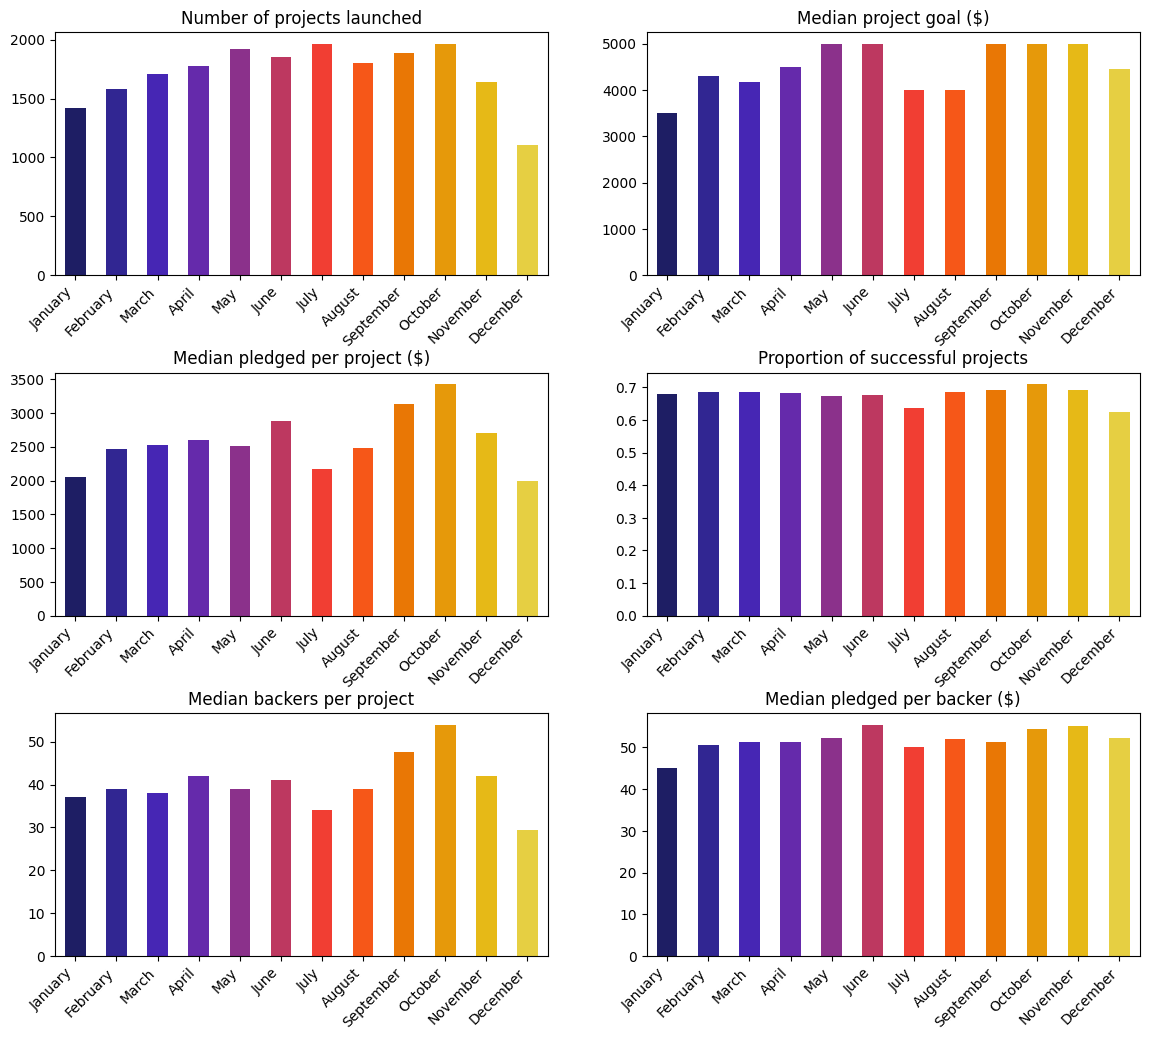

In [53]:
import calendar
# Creating a dataframe grouped by the month in which they were launched, with columns for failed and successful
month_df = pd.get_dummies(data.set_index('launch_month').state).groupby('launch_month').sum()

# Plotting
months = list(calendar.month_name)[1:]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,data.launch_month.nunique()))

data.groupby('launch_month').launch_month.count().reindex(months).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

data.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

data.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

data.groupby('launch_month').backers_count.median().reindex(months).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

data.groupby('launch_month').pledge_per_backer.median().reindex(months).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.4)
plt.show()

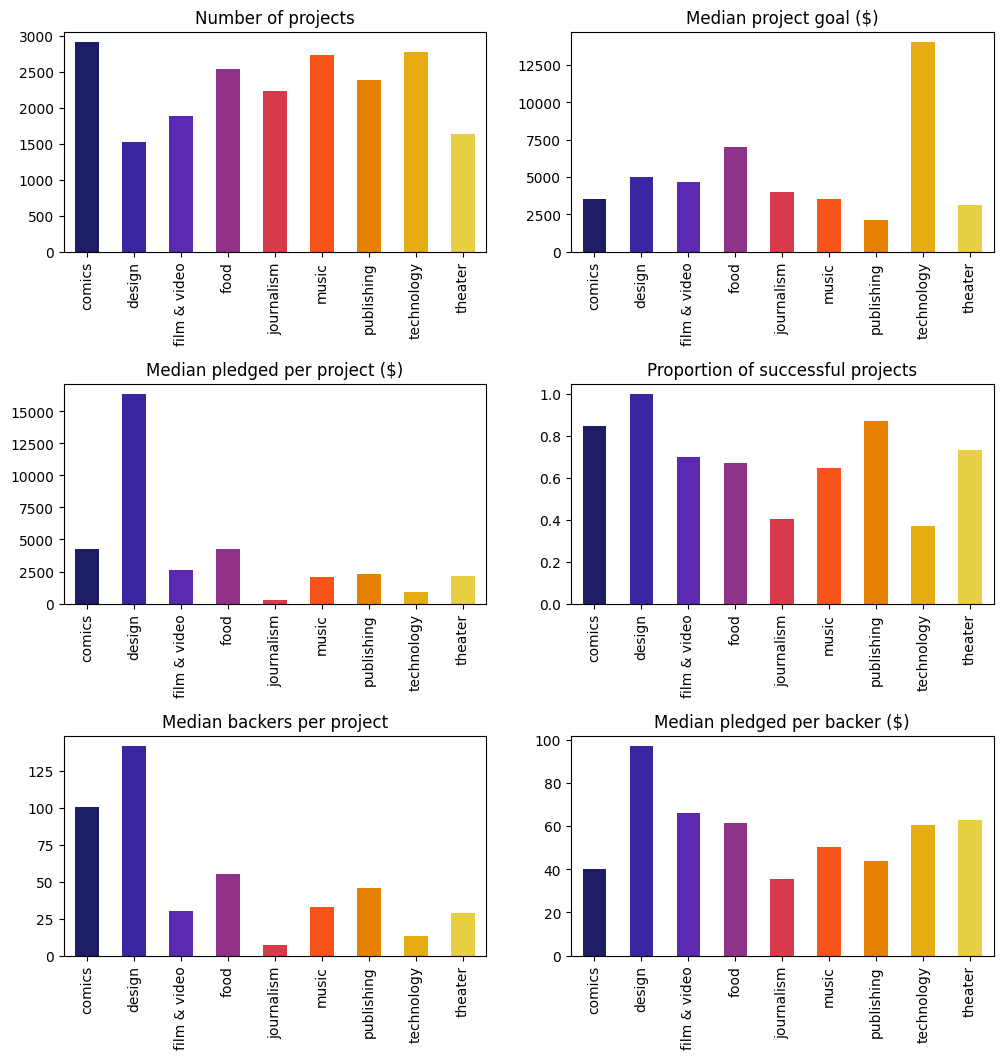

In [54]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(data.set_index('category').state).groupby('category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,data.category.nunique())) # Setting a colormap

data.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

data.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

data.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

data.groupby('category').backers_count.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

data.groupby('category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

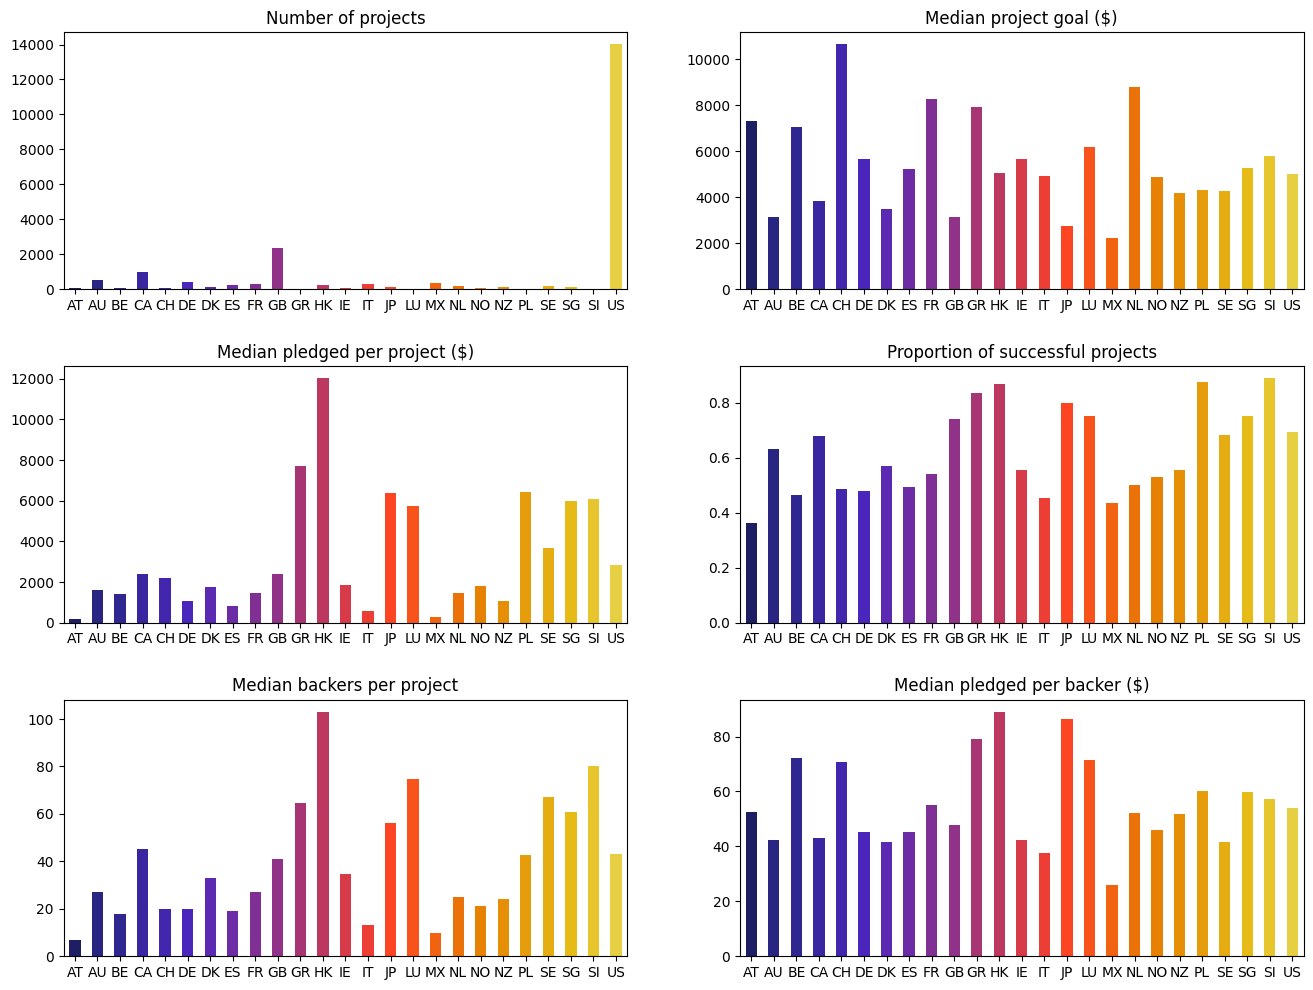

In [55]:
# Creating a dataframe grouped by country with columns for failed and successful
country_df = pd.get_dummies(data.set_index('country').state).groupby('country').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))

color = cm.CMRmap(np.linspace(0.1,0.8,data.country.nunique()))

data.groupby('country').country.count().plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

data.groupby('country').usd_goal.median().plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

data.groupby('country').usd_pledged.median().plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

data.groupby('country').backers_count.median().plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

data.groupby('country').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()


In [56]:
data.head()

,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,...,sub_category,usd_goal,name_length,create_to_launch,campaign_days,launch_day,deadline_day,launch_month,deadline_month,pledge_per_backer
15,45,theater,GB,2022-07-13 15:40:49,2022-09-12 21:00:00,2018647774,False,2022-07-15 21:20:34,False,successful,...,spaces,3087.0,4,2,59,Friday,Monday,July,September,81.28
16,22,theater,IT,2022-06-22 10:16:42,2022-08-29 22:01:21,2011643749,False,2022-06-30 22:01:21,False,successful,...,spaces,1580.0,6,8,60,Thursday,Monday,June,August,74.24
17,73,theater,US,2022-04-09 21:14:36,2022-05-26 22:00:00,1189141333,False,2022-05-12 18:28:01,False,successful,...,spaces,25000.0,6,33,14,Thursday,Thursday,May,May,346.10
18,25,theater,MX,2022-04-12 03:38:07,2022-04-28 04:59:00,449423332,False,2022-04-12 05:36:57,False,successful,...,spaces,558.0,6,0,16,Tuesday,Thursday,April,April,34.34
19,200,theater,US,2022-02-02 17:21:54,2022-04-21 20:43:20,1033917726,False,2022-03-22 20:43:20,True,successful,...,spaces,15000.0,9,48,30,Tuesday,Thursday,March,April,161.01


In [57]:
final_data = data.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'pledge_per_backer'], axis=1)
final_data.head()

,category,country,id,staff_pick,state,blurb_length,usd_goal,name_length,create_to_launch,campaign_days,launch_day,deadline_day,launch_month,deadline_month
15,theater,GB,2018647774,False,successful,19.0,3087.0,4,2,59,Friday,Monday,July,September
16,theater,IT,2011643749,False,successful,18.0,1580.0,6,8,60,Thursday,Monday,June,August
17,theater,US,1189141333,False,successful,11.0,25000.0,6,33,14,Thursday,Thursday,May,May
18,theater,MX,449423332,False,successful,21.0,558.0,6,0,16,Tuesday,Thursday,April,April
19,theater,US,1033917726,True,successful,22.0,15000.0,9,48,30,Tuesday,Thursday,March,April


In [58]:
final_data['state'] = final_data['state'].replace({'failed': 0, 'successful': 1})


In [59]:
# Converting boolean features to string to include them in one-hot encoding
final_data['staff_pick'] = final_data['staff_pick'].astype(str)

In [60]:
# Creating dummy variables
final_data = pd.get_dummies(final_data)

In [61]:
final_data.head()

,id,state,blurb_length,usd_goal,name_length,create_to_launch,campaign_days,category_comics,category_design,category_film & video,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
15,2018647774,1,19.0,3087.0,4,2,59,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16,2011643749,1,18.0,1580.0,6,8,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1189141333,1,11.0,25000.0,6,33,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18,449423332,1,21.0,558.0,6,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,1033917726,1,22.0,15000.0,9,48,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb

In [63]:
X_unscaled = final_data.drop('state', axis=1)
y = final_data.state

# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()


,id,blurb_length,usd_goal,name_length,create_to_launch,campaign_days,category_comics,category_design,category_film & video,category_food,...,deadline_month_December,deadline_month_February,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September
0,1.530165,0.207138,-0.046771,-0.668257,-0.343802,2.099520,-0.405602,-0.282298,-0.316986,-0.375091,...,-0.295493,-0.253292,-0.245952,-0.320492,-0.313082,-0.304039,-0.316801,-0.321318,-0.319479,3.302502
1,1.518851,0.027969,-0.050021,0.079915,-0.303680,2.181034,-0.405602,-0.282298,-0.316986,-0.375091,...,-0.295493,-0.253292,-0.245952,-0.320492,-0.313082,-0.304039,-0.316801,-0.321318,-0.319479,-0.302801
2,0.190205,-1.226219,0.000478,0.079915,-0.136507,-1.568588,-0.405602,-0.282298,-0.316986,-0.375091,...,-0.295493,-0.253292,-0.245952,-0.320492,-0.313082,-0.304039,3.156560,-0.321318,-0.319479,-0.302801
3,-1.004713,0.565478,-0.052224,0.079915,-0.357176,-1.405561,-0.405602,-0.282298,-0.316986,-0.375091,...,-0.295493,-0.253292,-0.245952,-0.320492,-0.313082,-0.304039,-0.316801,-0.321318,-0.319479,-0.302801
4,-0.060538,0.744647,-0.021084,1.202174,-0.036203,-0.264372,-0.405602,-0.282298,-0.316986,-0.375091,...,-0.295493,-0.253292,-0.245952,-0.320492,-0.313082,-0.304039,-0.316801,-0.321318,-0.319479,-0.302801


In [64]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)



1.Logistic regression

In [65]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


LogisticRegression()

In [66]:
# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [67]:
# Logistic regression scores
print("score in training set:", round(logreg.score(X_train, y_train),5))
print("score in test set:", round(logreg.score(X_test, y_test),5))



score in training set: 0.78522
score in test set: 0.77968


In [68]:

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
b=metrics.accuracy_score(y_test, y_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",b*100)

Accuracy: 80.69778711032144


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_pred_dt,y_test))
print(classification_report(Y_pred_dt,y_test))

[[1141  821]
 [ 850 3379]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1962
           1       0.80      0.80      0.80      4229

    accuracy                           0.73      6191
   macro avg       0.69      0.69      0.69      6191
weighted avg       0.73      0.73      0.73      6191



In [72]:
from sklearn.metrics import accuracy_score
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 73.01 %


In [73]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_pred_dt,y_test))
print(classification_report(Y_pred_dt,y_test))

[[1141  821]
 [ 850 3379]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1962
           1       0.80      0.80      0.80      4229

    accuracy                           0.73      6191
   macro avg       0.69      0.69      0.69      6191
weighted avg       0.73      0.73      0.73      6191



In [75]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.61 %


In [76]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

Y_pred_nb = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_pred_dt,y_test))
print(classification_report(Y_pred_dt,y_test))

score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")


[[1141  821]
 [ 850 3379]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1962
           1       0.80      0.80      0.80      4229

    accuracy                           0.73      6191
   macro avg       0.69      0.69      0.69      6191
weighted avg       0.73      0.73      0.73      6191

The accuracy score achieved using Naive Bayes is: 53.51 %


In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

In [78]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+"%")

The accuracy score achieved using Logistic Regression is: 77.97%
